In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

In [5]:
df = pd.read_csv('./dataset/Countrywise mental disorder.csv')
df

,Country,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depression,Alcohol use disorders
0,Argentina,1990,0.194422,0.755674,0.323686,6.165921,0.919424,3.569180,1.918939
1,Argentina,1991,0.194184,0.756386,0.326904,6.174471,0.920323,3.579068,2.022040
2,Argentina,1992,0.194034,0.757139,0.330504,6.182707,0.921296,3.588855,2.116047
3,Argentina,1993,0.193973,0.757909,0.334286,6.190356,0.921620,3.597366,2.193307
4,Argentina,1994,0.194004,0.758686,0.338418,6.197271,0.921581,3.606913,2.246206
...,...,...,...,...,...,...,...,...,...
1311,Zimbabwe,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
1312,Zimbabwe,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
1313,Zimbabwe,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
1314,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [6]:
df.dtypes

Country                   object
Year                       int64
Schizophrenia            float64
Bipolar disorder         float64
Eating disorders         float64
Anxiety disorders        float64
Drug use disorders       float64
Depression               float64
Alcohol use disorders    float64
dtype: object

In [7]:
# Group the data by Centername and months and take the mean of the fruit prices for each group
data = df.groupby(["Country", "Year"]).mean().reset_index()
data

,Country,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depression,Alcohol use disorders
0,Argentina,1990,0.194422,0.755674,0.323686,6.165921,0.919424,3.569180,1.918939
1,Argentina,1991,0.194184,0.756386,0.326904,6.174471,0.920323,3.579068,2.022040
2,Argentina,1992,0.194034,0.757139,0.330504,6.182707,0.921296,3.588855,2.116047
3,Argentina,1993,0.193973,0.757909,0.334286,6.190356,0.921620,3.597366,2.193307
4,Argentina,1994,0.194004,0.758686,0.338418,6.197271,0.921581,3.606913,2.246206
...,...,...,...,...,...,...,...,...,...
1311,Zimbabwe,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
1312,Zimbabwe,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
1313,Zimbabwe,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
1314,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [8]:
X = data[["Country", "Year"]]
y = data.drop(["Country", "Year"], axis=1)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
trf1=ColumnTransformer([ 
    ('ohe_Country', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0]),
    ],remainder='passthrough')

In [11]:
from sklearn.ensemble import RandomForestRegressor
trf2 = DecisionTreeRegressor(random_state=0)

In [12]:
# Create the pipeline for one-hot encoding and linear regression
pipeline = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),])
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Country',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2', DecisionTreeRegressor(random_state=0))])

In [13]:
# Evaluate the pipeline on the testing data
score = pipeline.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.9993736878978943


In [14]:
y_pred = pipeline.predict(X_test)
y_pred

array([[0.252174, 1.103326, 0.462236, ..., 1.516393, 4.257338, 1.407681],
       [0.251197, 0.578247, 0.196888, ..., 0.664769, 3.461155, 0.644343],
       [0.21744 , 0.534204, 0.115784, ..., 0.543623, 2.616892, 0.56679 ],
       ...,
       [0.247568, 0.925712, 0.432339, ..., 0.67709 , 4.679851, 1.187652],
       [0.263563, 0.555144, 0.139099, ..., 0.503234, 3.520174, 1.178418],
       [0.253872, 1.108573, 0.513942, ..., 1.705342, 4.218074, 1.553516]])

In [15]:
from sklearn.metrics import mean_squared_error
# Make predictions on the testing data

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.014737179665872322


In [16]:
#cross-validation scores for test data
scores = cross_val_score(pipeline, X_test, y_test, cv=5)  
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.98931015 0.88769685 0.98534146 0.99548478 0.99047697]
Mean Score: 0.9696620407605525


c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and 

In [17]:
#cross-validation scores for train data
scores = cross_val_score(pipeline, X_train, y_train, cv=5)  
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99926361 0.9989574  0.99909376 0.99865967 0.99927306]
Mean Score: 0.9990494993837524


c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and 

In [18]:
# # export 
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))


In [19]:
import pickle

# Assuming you have a saved model named 'model.pkl'

# Specify the file path of the saved model
model_path = 'model.pkl'

# Load the model using pickle
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Take inputs from the user for prediction
country = input("Enter the country: ")
year = int(input("Enter the year: "))

# Create a feature input for prediction
features = [[country, year]]

# Perform any necessary preprocessing on the features, such as scaling

# Make predictions using the loaded model
predictions = model.predict(features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [[0.260509 0.55639  0.15115  3.294846 0.517256 3.515554 1.128306]]


c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [20]:
df["Country"].unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'China',
       'Denmark', 'England', 'France', 'Germany', 'Greece', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand',
       'North America', 'Norway', 'Oceania', 'Pakistan', 'Philippines',
       'Portugal', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United States', 'Vietnam', 'Zimbabwe'],
      dtype=object)

In [21]:
pipeline_rf = Pipeline([
('trf1', trf1),
('regressor', RandomForestRegressor(random_state=0))
])
pipeline_dt = Pipeline([
('trf1', trf1),
('regressor', DecisionTreeRegressor(random_state=0))
])

pipeline_lr = Pipeline([
('trf1', trf1),
('regressor', LinearRegression())
])

pipeline_ridge = Pipeline([
    ('trf1', trf1),
    ('regressor', Ridge())
])

pipeline_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)
pipeline_ridge.fit(X_train, y_train)

c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and 

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Country',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('regressor', Ridge())])

In [22]:
score_rf = pipeline_rf.score(X_test, y_test)
score_dt = pipeline_dt.score(X_test, y_test)
score_lr = pipeline_lr.score(X_test, y_test)

y_pred_rf = pipeline_rf.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)

r2_score_rf = r2_score(y_test, y_pred_rf)
r2_score_dt = r2_score(y_test, y_pred_dt)
r2_score_lr = r2_score(y_test, y_pred_lr)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Calculate scores and predictions for Ridge Regression
score_ridge = pipeline_ridge.score(X_test, y_test)
y_pred_ridge = pipeline_ridge.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)


In [23]:
#Print the scores
print("Random Forest Regression")
print("R-squared score:", score_rf)
print("RMSE:", rmse_rf)
print()

print("Decision Tree Regression")
print("R-squared score:", score_dt)
print("RMSE:", rmse_dt)
print()

print("Linear Regression")
print("R-squared score:", score_lr)
print("RMSE:", rmse_lr)
print()

# Print the scores for Ridge Regression
print("Ridge Regression")
print("R2 Score:", r2_score_ridge)
print("RMSE:", rmse_ridge)
print()

Random Forest Regression
R-squared score: 0.9996331772476117
RMSE: 0.011423657211499086

Decision Tree Regression
R-squared score: 0.9993736878978943
RMSE: 0.014737179665872322

Linear Regression
R-squared score: 0.9869736705560125
RMSE: 0.06222799210678069

Ridge Regression
R2 Score: 0.9846483110760511
RMSE: 0.0695566221104831



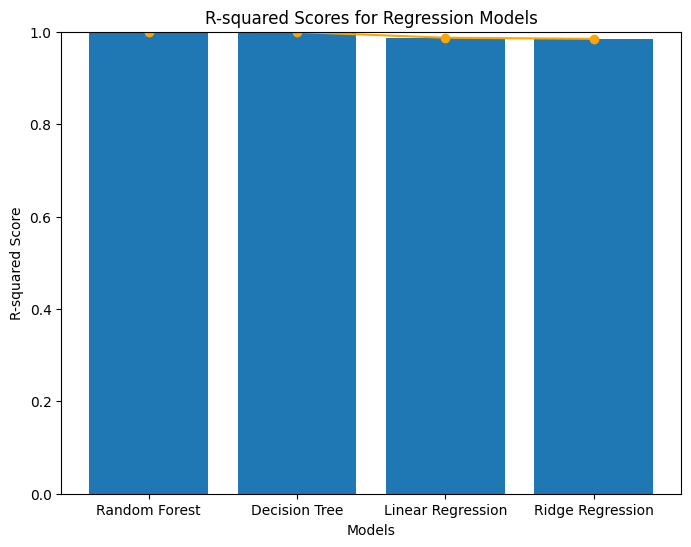

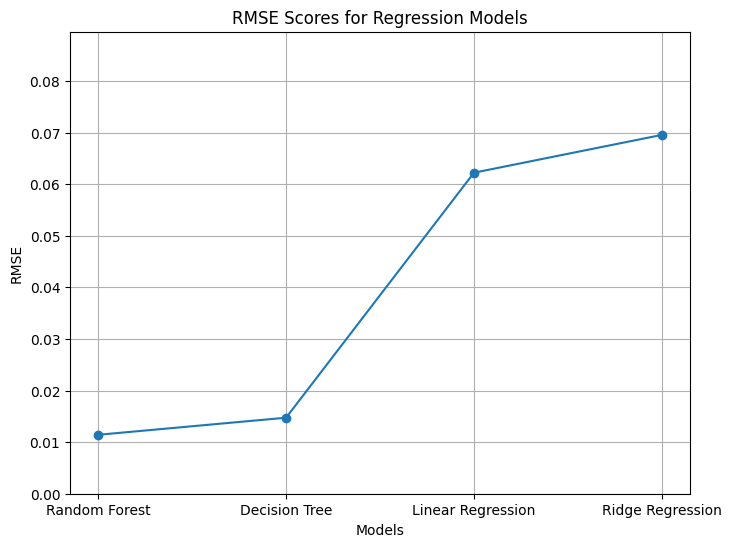

In [24]:
import matplotlib.pyplot as plt

#R-squared scores
r2_scores = [score_rf, score_dt, score_lr,score_ridge]
models = ["Random Forest", "Decision Tree", "Linear Regression","Ridge Regression"]

#RMSE scores
rmse_scores = [rmse_rf, rmse_dt, rmse_lr,rmse_ridge]

#Line graph for R-squared scores
plt.figure(figsize=(8, 6))
plt.plot(models, r2_scores, marker='o', color='orange')
plt.bar(models, r2_scores)
plt.title("R-squared Scores for Regression Models")
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.ylim(0, 1)
plt.show()

#Bar graph for RMSE scores
plt.figure(figsize=(8, 6))
plt.plot(models, rmse_scores,marker='o')
plt.title("RMSE Scores for Regression Models")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.ylim(0, max(rmse_scores) + 0.02) # Adjusted y-axis limits
plt.grid(True)
plt.show()